# ReflexAI
**Take Home Assignment - Senior Machine Learning Engineer**

**Submitted by:** Ameer H Janjua  
**Submission Date:** 04/27/2024  


## Python Dependencies and Packages

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Download NLTK resources (run only once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

## EDA - Exploratory Data Analysis

### Data Exploration

In [32]:

# Load the Dataset
data = pd.read_csv('AnnoMI-full.csv')

# Data Exploration
# Display the first few rows of the dataset
data.head()


,mi_quality,transcript_id,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,annotator_id,therapist_input_exists,therapist_input_subtype,reflection_exists,reflection_subtype,question_exists,question_subtype,main_therapist_behaviour,client_talk_type
0,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,3,False,NaN,False,NaN,True,open,question,NaN
1,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
2,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",3,True,information,False,NaN,False,NaN,therapist_input,NaN
3,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
4,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,3,True,information,False,NaN,False,NaN,therapist_input,NaN


In [33]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13551 entries, 0 to 13550
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mi_quality                13551 non-null  object
 1   transcript_id             13551 non-null  int64 
 2   video_title               13551 non-null  object
 3   video_url                 13551 non-null  object
 4   topic                     13551 non-null  object
 5   utterance_id              13551 non-null  int64 
 6   interlocutor              13551 non-null  object
 7   timestamp                 13551 non-null  object
 8   utterance_text            13551 non-null  object
 9   annotator_id              13551 non-null  int64 
 10  therapist_input_exists    6826 non-null   object
 11  therapist_input_subtype   1216 non-null   object
 12  reflection_exists         6826 non-null   object
 13  reflection_subtype        2021 non-null   object
 14  question_exists       

In [34]:
# Display basic statistics for numeric columns
data.describe()

,transcript_id,utterance_id,annotator_id
count,13551.000000,13551.000000,13551.000000
mean,67.605933,74.602465,4.647111
std,37.286221,90.373561,2.760160
min,0.000000,0.000000,0.000000
25%,41.000000,17.000000,2.000000
50%,58.000000,42.000000,5.000000
75%,100.000000,99.000000,7.000000
max,133.000000,597.000000,9.000000


In [37]:
# Data Cleaning and Preparation
# Check for missing values
missing_values = data.isnull().sum()
display(missing_values)

mi_quality                      0
transcript_id                   0
video_title                     0
video_url                       0
topic                           0
utterance_id                    0
interlocutor                    0
timestamp                       0
utterance_text                  0
annotator_id                    0
therapist_input_exists       6725
therapist_input_subtype     12335
reflection_exists            6725
reflection_subtype          11530
question_exists              6725
question_subtype            11238
main_therapist_behaviour     6725
client_talk_type             6826
dtype: int64

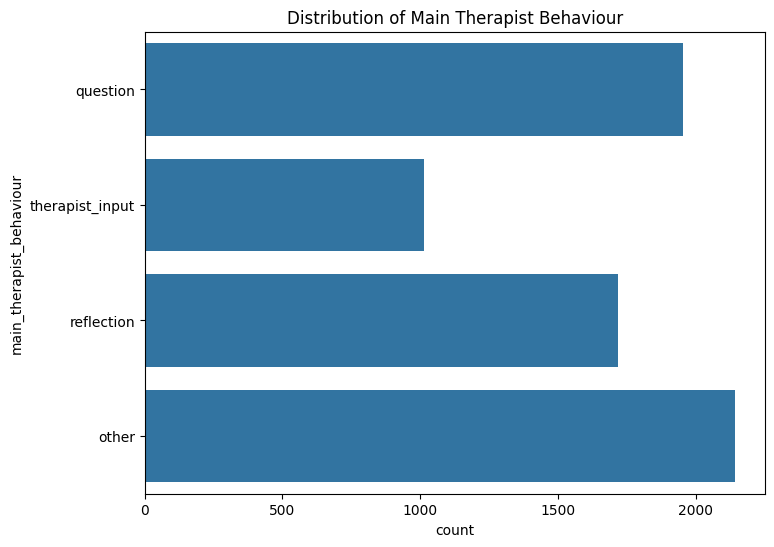

In [38]:

# Distribution of the target variable i.e. Therapist Behavior
plt.figure(figsize=(8, 6))
sns.countplot(data['main_therapist_behaviour'])
plt.title('Distribution of Main Therapist Behaviour')
plt.show()



### Word Frequency Analysis

In [ ]:
# Load relevant packages
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#### Basic Word Frequency Statistics

In [ ]:
# Display basic statistics
print("Number of utterances:", len(data))
print("Number of unique utterances:", len(data['utterance_text'].unique()))

# Word frequency analysis
all_text = ' '.join(data['utterance_text'].unique().tolist())
stop_words = set(stopwords.words('english'))
# Create custom filter for removing common phrases and words
custom_filter_words = set(["like", "yeah", "okay", "know", "um", "really", "right", "uh", "would", "things","well","got","gon"])
stop_words = stop_words.union(custom_filter_words)
word_tokens = word_tokenize(all_text.lower())
filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
filtered_text = ' '.join(filtered_text)
word_counts = Counter(filtered_text.split())
print("\nTop 10 most common words after removing stop words and custom filter words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")


Number of utterances: 13551
Number of unique utterances: 7364

Top 10 most common words after removing stop words and custom filter words:
think: 804
get: 598
na: 503
good: 479
mean: 479
something: 473
kind: 473
time: 473
go: 449
want: 376


#### Wordcloud for All Utterances

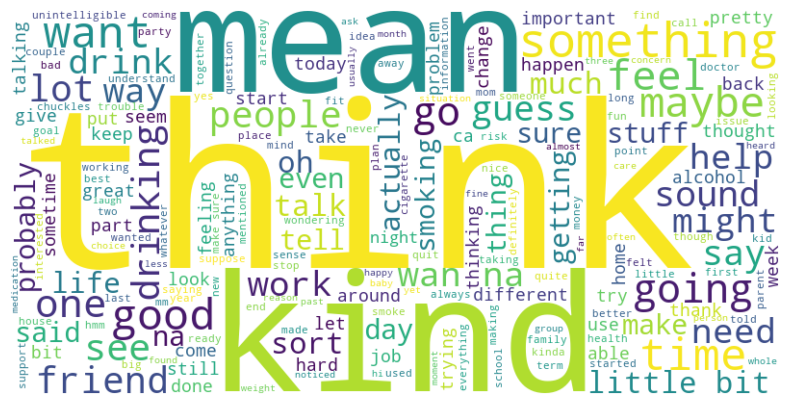

In [ ]:
# Word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(filtered_text)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### High vs. Low Quality Word Frequency Comparison

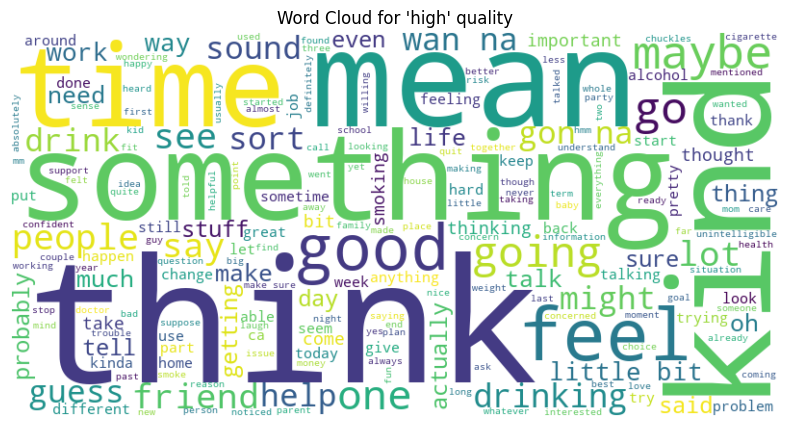

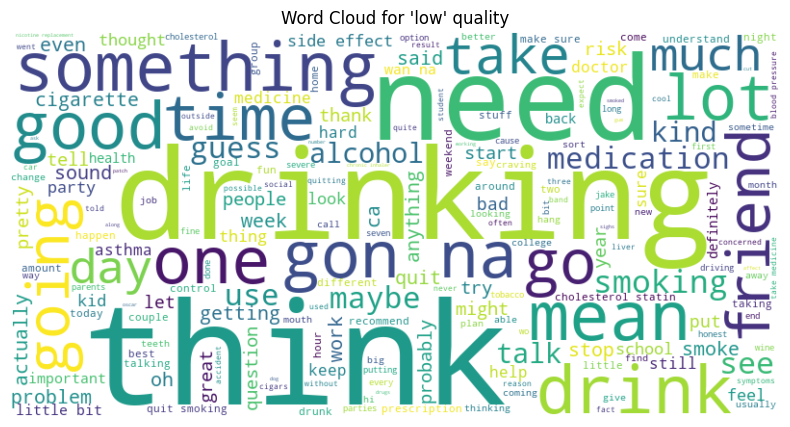

In [ ]:
# Create separate dataframes for 'high' and 'low' quality
df_high = data[data['mi_quality'] == 'high']
df_low = data[data['mi_quality'] == 'low']

# Create custom filter for common 
custom_filter_words = set(["like", "yeah", "okay", "know", "um", "really", "right", "uh", "would", "things","well","got","want"])

# Word frequency analysis for 'high' quality
all_text_high = ' '.join(df_high['utterance_text'].unique().tolist())
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(custom_filter_words)
word_tokens_high = word_tokenize(all_text_high.lower())
filtered_text_high = [word for word in word_tokens_high if word.isalnum() and word not in stop_words]
filtered_text_high = ' '.join(filtered_text_high)
word_counts_high = Counter(filtered_text_high.split())


# Word frequency analysis for 'low' quality
all_text_low = ' '.join(df_low['utterance_text'].unique().tolist())
word_tokens_low = word_tokenize(all_text_low.lower())
filtered_text_low = [word for word in word_tokens_low if word.isalnum() and word not in stop_words]
filtered_text_low = ' '.join(filtered_text_low)
word_counts_low = Counter(filtered_text_low.split())

# Word cloud for 'high' quality
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_high)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for 'high' quality")
plt.show()

# Word cloud for 'low' quality
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_low)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for 'low' quality")
plt.show()

### Notable Data Features

#### 1. Column Identification and Selection

Following columns are most relevant to current analysis:
- interlocutor - The Speaker as we are just predicting values for the 'Therapist'
- utterance_text - the dialogue - 'Input Data' for models
- main_therapist_behaviour - The behaviour label - 'Target Variable' for the models

Additional columns that can be used/tested for future feature engineering:
- mi_quality - Comparison of high and low quality interviewing - Separate models can be created to two qualities
- timestamp - Can be used to enhance contextual understaing for the models
- annotator_id - Can be used to add more labeling context (e.g. LLM)

#### 2. Dummy Variables 

Following columns are essentially dummy variables for the target variable (main_therapist_behaviour)

- therapist_input_exists	
- reflection_exists
- question_exists

and hence are discarded for current analysis.

#### 3. Data Duplication and Inconsistencies

After filtering just the utterances from the therapist following script identifies the duplicate utterances in the data:

In [ ]:
# Group by 'utterance_text' and 'utterance_id' and count occurrences
grouped = data.groupby(["utterance_text", "utterance_id"]).size()

# Identify combinations with more than one occurrence
duplicates = grouped[grouped > 1]

# Count the total number of duplicate groups
duplicate_count = len(duplicates)

print(f"Total number of duplicate 'utterance_text' with matching 'utterance_id': {duplicate_count}")

The duplication occurs because multiple annotators label the utterances. Although most labels are consistent across all annotators, there are some utterances in the dataset that are labeled differently by various annotators. Following snippet of code identifies some of these inconsistencies:

In [ ]:
# Group by 'utterance_text' and count unique 'annotator_id' and 'main_therapist_behaviour'
grouped = data.groupby("utterance_text").agg({
    "annotator_id": "nunique",
    "main_therapist_behaviour": "nunique"
})

# Find groups where both 'annotator_id' and 'main_therapist_behaviour' have multiple unique values
inconsistencies = grouped[
    (grouped["annotator_id"] > 1) & (grouped["main_therapist_behaviour"] > 1)
]

# Get the rows from the original dataframe that correspond to these inconsistencies
inconsistent_rows = data[data["utterance_text"].isin(inconsistencies.index)]

display(inconsistent_rows)

## Data Preprocessing

This is a clean dataset and does not require any cleaning/wrangling. We only need to subset the 'Therapist' utterances for model building.

In [41]:
# Filter out only Therapist utterances - The Input field
data= data[data['interlocutor'] == 'therapist']


## Model Building and Evaluation

####  Data Preparation

In [50]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Preprocessing: Lowercase and remove punctuation
data['utterance_text'] = data['utterance_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# Text Vectorization with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['utterance_text'])

# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['main_therapist_behaviour'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Support Vector Machine (SVM) Model

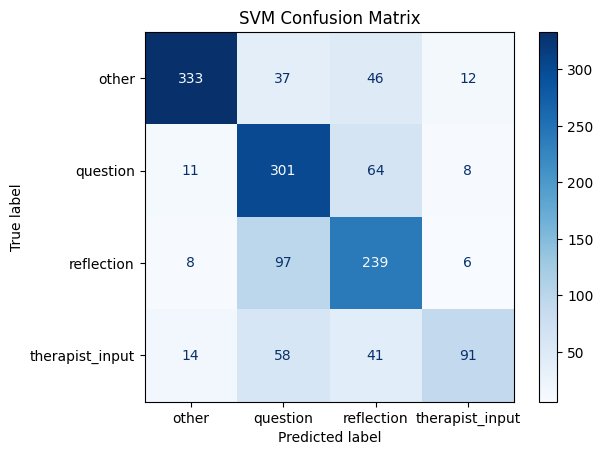

SVM Accuracy: 0.71
SVM F1-score: 0.71
SVM Precision: 0.73
SVM Recall: 0.71


In [51]:
# SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

# Metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"SVM F1-score: {svm_f1:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Recall: {svm_recall:.2f}")

#### 2. Random Forest Model

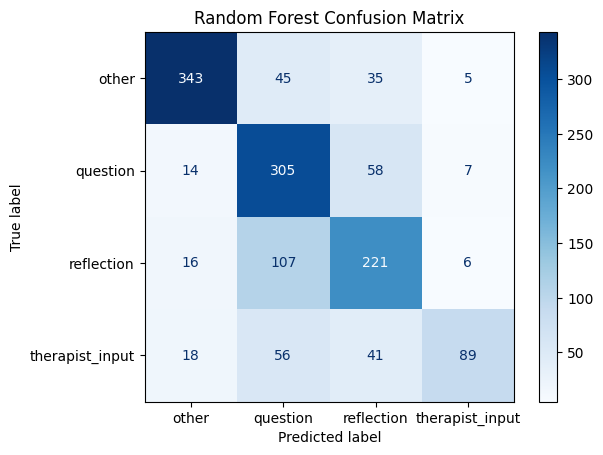

Random Forest Accuracy: 0.70
Random Forest F1-score: 0.70
Random Forest Precision: 0.73
Random Forest Recall: 0.70


In [52]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Metrics for RF
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest F1-score: {rf_f1:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")

#### 3. LSTM Model for Text Classification

In [70]:
# Reset Data for fresh model
data = pd.read_csv("AnnoMI-full.csv")
data= data[data['interlocutor'] == 'therapist']

Attempt 1

Epoch 1/5


c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.3034 - loss: 1.3545 - val_accuracy: 0.3214 - val_loss: 1.3498
Epoch 2/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.4410 - loss: 1.2158 - val_accuracy: 0.4956 - val_loss: 1.1666
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.4966 - loss: 1.1407 - val_accuracy: 0.4934 - val_loss: 1.1697
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.4943 - loss: 1.1350 - val_accuracy: 0.4898 - val_loss: 1.1712
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.5034 - loss: 1.1350 - val_accuracy: 0.4890 - val_loss: 1.1713
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


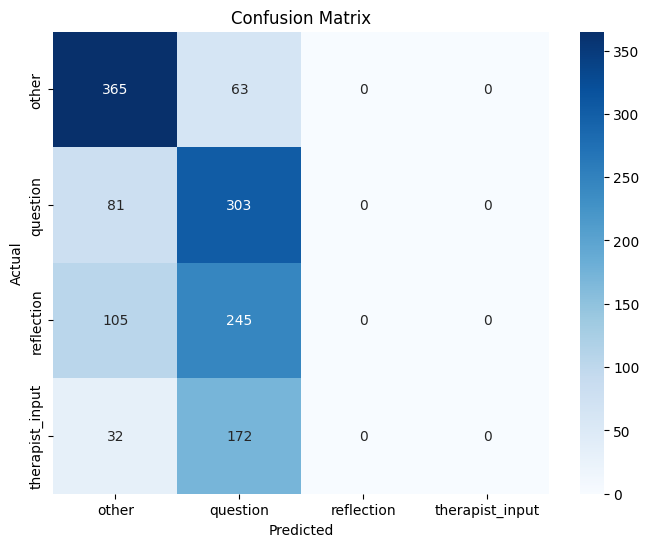

Accuracy: 0.4890190336749634
F1 Score: 0.3722138747282175
Precision: 0.3049462187178889
Recall: 0.4890190336749634
Classification Report:
                  precision    recall  f1-score   support

          other       0.63      0.85      0.72       428
       question       0.39      0.79      0.52       384
     reflection       0.00      0.00      0.00       350
therapist_input       0.00      0.00      0.00       204

       accuracy                           0.49      1366
      macro avg       0.25      0.41      0.31      1366
   weighted avg       0.30      0.49      0.37      1366



c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Label encoding for the target variable
label_encoder = LabelEncoder()
data['main_therapist_behaviour'] = label_encoder.fit_transform(data['main_therapist_behaviour'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['utterance_text'], data['main_therapist_behaviour'], test_size=0.2, random_state=42)

# Tokenization and padding
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)  # Number of words to keep
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform length
max_sequence_len = 100
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_len, padding='post')
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_len, padding='post')

# Define the LSTM model
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=max_sequence_len),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(4, activation='softmax')  # 4 classes, so use softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Evaluate the model
y_pred = model.predict(X_test_padded).argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 to consider class imbalance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


![LSTM Attempt 1 Output](LSTM_ouput_1.png)

The model's predictions are only yielding classes 0 and 1, there could be a few reasons for this outcome:

- Class Imbalance: If the dataset is heavily skewed towards a few classes, the model might struggle to learn the underrepresented classes. This is not the case for our data.
- Model Complexity: If the LSTM layers are too simplistic, the model might not be capturing sufficient information to differentiate between more classes.

- Attemp 2:
- To address the above mentioned issues, let's revisit the model to ensure it is set up for multi-class classification and has sufficient complexity to capture all classes:

In [73]:
# Reset data for fresh model
data = pd.read_csv("AnnoMI-full.csv")
data= data[data['interlocutor'] == 'therapist']

main_therapist_behaviour
0    2143
1    1954
2    1717
3    1012
Name: count, dtype: int64
Epoch 1/10


c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


171/171 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.2979 - loss: 1.3556 - val_accuracy: 0.3236 - val_loss: 1.3434
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.4019 - loss: 1.2563 - val_accuracy: 0.3924 - val_loss: 1.2628
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.3789 - loss: 1.2853 - val_accuracy: 0.3228 - val_loss: 1.3382
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.3242 - loss: 1.3311 - val_accuracy: 0.3324 - val_loss: 1.3292
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.3149 - loss: 1.3543 - val_accuracy: 0.2921 - val_loss: 1.3210
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.3854 - loss: 1.2670 - val_accuracy: 0.5278 - val_loss: 1.1195
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.5099 - loss: 1.0966 - val_accuracy: 0.5476 - val_loss: 1.0616
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.5569 - loss: 1.0059 - val_accurac

c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


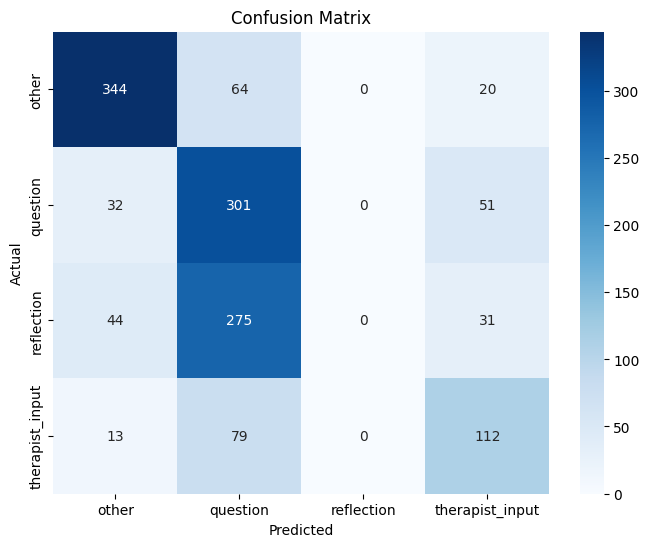

Accuracy: 0.5541727672035139
F1 Score: 0.483824333369053
Precision: 0.44476623364848294
Recall: 0.5541727672035139
Classification Report:
                  precision    recall  f1-score   support

          other       0.79      0.80      0.80       428
       question       0.42      0.78      0.55       384
     reflection       0.00      0.00      0.00       350
therapist_input       0.52      0.55      0.54       204

       accuracy                           0.55      1366
      macro avg       0.43      0.53      0.47      1366
   weighted avg       0.44      0.55      0.48      1366



c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the target variable
label_encoder = LabelEncoder()
data['main_therapist_behaviour'] = label_encoder.fit_transform(data['main_therapist_behaviour'])

# Check the distribution of classes to detect any imbalance
print(data['main_therapist_behaviour'].value_counts())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['utterance_text'], data['main_therapist_behaviour'], test_size=0.2, random_state=42)

# Tokenization and padding
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)  # Number of words to keep
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform length
max_sequence_len = 100
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_len, padding='post')
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_len, padding='post')

# Define a more complex LSTM model with Dropout to prevent overfitting
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=max_sequence_len),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')  # 4 classes, use softmax activation
])

# Compile the model for multi-class classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs to ensure better learning
model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test), batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test_padded).argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 to consider class imbalance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with clearer axis labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


![LSTM Attempt 1 Output](LSTM_ouput_2.png)

#### 4. Text Classification Using LLM - OpenAI API

The following block of script uses OpenAI's API to access GPT 3.5 Turbo and GPT 4 models to classify the 'Therapist uttrances'. To run the script please use a valid OpenAI API Key.

In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = ""

# Define a function to send data to OpenAI API
def get_prediction(row):
    prompt = f"Therapist: {row['utterance_text']}"
    response = openai.ChatCompletion.create(
        #model="gpt-3.5-turbo",
        model="gpt-4",
        messages=[
            {"role": "system", "content": """ You are text classification expert. You are given only the therapist dialogue from conversation betweeen therapist and patients on diffrent topics. Your job is to analyze the given text and categorize the text into following four categories: 1. 'question' 2. 'reflection' 3. 'therapist input' 4. 'other'. Respond back only with one of the four categories provided earlier. 
             Here are few examples of the four categories for better contextual understanding:
             'question':
            ""1. Okay. Do you have brothers or sisters?
                2. So you shared that you're, um, here today because you're having some dissatisfaction with your body and your confidence and your mood and your energy. And you're looking for, um, some different patterns to kind of turn things around for yourself. And what I like to do as I get to know clients is-is let them know a little bit about my philosophies, about health and wellbeing. Um, but first, I'd love to hear what are your philosophies about health and wellbeing?
                3. Okay. So, four or five. How combat, like, not like a two or three.""

                'reflection':
                ""1. I want the friends and the relationship that I get from my friends, and at the same time, I don't want the party scene that goes with that.
                2. Yeah, you feel more accomplished and-and you feel less irritated by the small stuff.
                3. Mm. I'm not saying that the pain's in your mind. Um, I guess what I'm saying is that sometimes the way that we feel, and the way that our lives are going, can impact how we notice our symptoms. Given that we've tried medication for you, and we've tried investigations, and we've drawn a blank really, with those, none of those have really helped you-
                4. I think so. So you've identified one of the four that might-- you might be willing to-to try-""

                'therapist_input':
                ""1. Good. Well, you've got some good plans and we'll go check it out and make sure they happen.
                2. Okay, okay. Well, sometimes when people aren't ready to make changes like this, it helps if they write down their goals, it gives them a chance to see them in black and white. If you were to look at this little form here and figure out where you want to go with your drinking, what would you put down as your goal?
                3. [chuckles] Not necessarily the-the most exciting thing for you to do, but I appreciate you are willing to do that. Can I also ask you to do a little bit of homework between now and next week? I promise it's not too time-consuming. Um, we have a booklet that we like to give folks who are just thinking about changing, who aren't sure that this is something that they're ready to do, and one of the exercises is to write down your top three reasons for change, why you would even consider quitting smoking. And then to reflect on some of the good things as we talked about, as well as some of the less good things about quitting and about continuing to smoke. Is that something you'd be willing to do over the next few days?
                ""

                'other':
                ""1. Yeah, yeah. 2. Okay. Uh-huh. Hm. Uh-huh. Mm-hmm.3. Food is meant to be enjoyed, and it's a source of pleasure. So I'd want to help you certainly look for ways to add more fruits and vegetables and-and things that nourish your body, but also look for ways to add pleasure- 4. Yeah. Mm-hmm. 5. Yeah, I'm all about trying to help you figure out what types of physical activity bring you the most joy because those are the things that you'll make time for.""
              """},
            {"role": "user", "content": prompt}
        ]
    )
    return response['choices'][0]['message']['content'].strip()

# Apply the function to each row and store the result in a new column
data['predicted_main_therapist_behaviour'] = data.apply(get_prediction, axis=1)

# Define a function to map the predicted values to the four options
def map_behaviour(prediction):
    if "question" in prediction:
        return "question"
    elif "reflection" in prediction:
        return "reflection"
    elif "therapist input" in prediction:
        return "therapist input"
    else:
        return "other"

# Map the predicted values to the four options
data['predicted_main_therapist_behaviour'] = data['predicted_main_therapist_behaviour'].apply(map_behaviour)

# Check accuracy
accuracy = (data['main_therapist_behaviour'] == data['predicted_main_therapist_behaviour']).mean()
print(f"Accuracy: {accuracy}")


#### GPT 3.5 & GPT 4 Accuracy Comparison

The code takes a long time to process all the data, so the analyses output of earlier runs for individual models is displayed as images below for convenience.

##### GPT 3.5 Output

![GPT 3.5 Accuracy](GPT_35_result.JPG)

##### GPT 4 Output - Top 1000 rows

![GPT 4 Accuracy](GPT_4_result.JPG)

##### GPT 4 Output - COmplete Dataset

![GPT 3.5 Accuracy](GPT_4_full_result.JPG)

#### Model Comparison

In [75]:
import pandas as pd
import numpy as np

# Sample data: model names and their metrics
model_data = {
    "Model": ["SVM", "Random Forest", "LSTM-1", "LSTM-2", "LLM-GPT 3.5", "LLM-GPT 4"],
    "Accuracy": [0.71, 0.70, 0.51, 0.57, 0.60, 0.67],  
    "Precision": [0.73, 0.73, 0.35, 0.61, 0, 0], 
    "Recall": [0.71, 0.70, 0.51, 0.57, 0, 0],  
    "F1-Score": [0.71, 0.70, 0.40, 0.58, 0, 0],
}


# Create a DataFrame from the dictionary
results_df = pd.DataFrame(model_data)

# Display the results as a table
print("Comparison of Model Performance:")
print(results_df)

# Sort the table by Accuracy
sorted_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\nModels Sorted by Accuracy:")
print(sorted_df)


Comparison of Model Performance:
           Model  Accuracy  Precision  Recall  F1-Score
0            SVM      0.71       0.73    0.71      0.71
1  Random Forest      0.70       0.73    0.70      0.70
2         LSTM-1      0.51       0.35    0.51      0.40
3         LSTM-2      0.57       0.61    0.57      0.58
4    LLM-GPT 3.5      0.60       0.00    0.00      0.00
5      LLM-GPT 4      0.67       0.00    0.00      0.00

Models Sorted by Accuracy:
           Model  Accuracy  Precision  Recall  F1-Score
0            SVM      0.71       0.73    0.71      0.71
1  Random Forest      0.70       0.73    0.70      0.70
5      LLM-GPT 4      0.67       0.00    0.00      0.00
4    LLM-GPT 3.5      0.60       0.00    0.00      0.00
3         LSTM-2      0.57       0.61    0.57      0.58
2         LSTM-1      0.51       0.35    0.51      0.40
